<a href="https://colab.research.google.com/github/AzenethSH/Estadistica/blob/main/Visa_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='V',            # V: Visa
    start='2024-04-10',        # Fecha de inicio
    end='2025-04-08',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume
Date,,,,,,
2024-04-10,275.420013,276.820007,274.119995,274.480011,272.447388,5276000
2024-04-11,274.000000,276.480011,272.179993,275.679993,273.638489,8102300
2024-04-12,275.549988,277.000000,274.059998,275.959991,273.916443,9037900
2024-04-15,277.890015,277.910004,270.339996,271.279999,269.271088,10267500
2024-04-16,270.540009,274.130005,270.170013,271.350006,269.340576,8237100
...,...,...,...,...,...,...
2025-04-01,350.440002,350.450012,342.570007,346.350006,346.350006,7473300
2025-04-02,343.440002,348.200012,343.049988,346.329987,346.329987,5682500
2025-04-03,333.899994,344.739990,331.000000,339.390015,339.390015,8792900


# Medias móviles

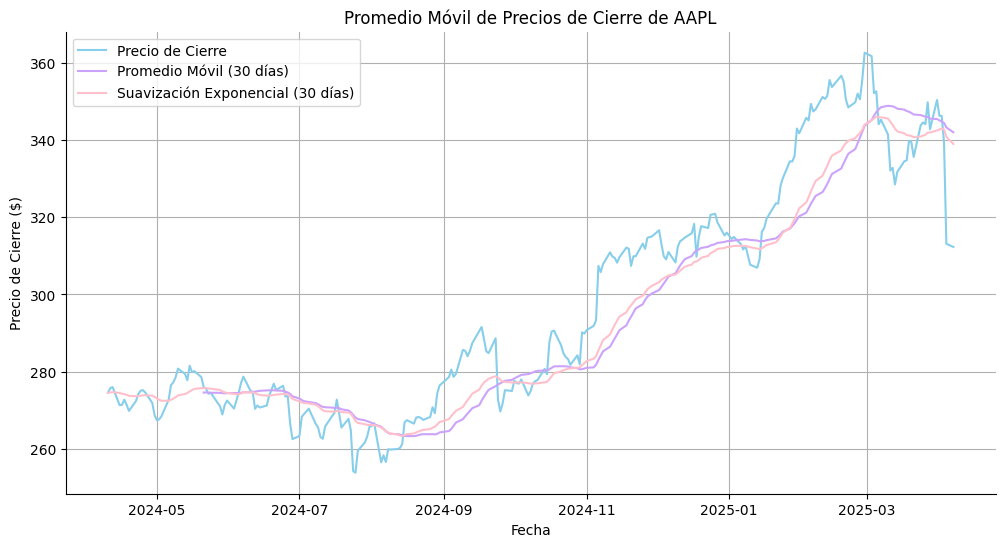

In [3]:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['V_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 30
df['SES'] = df['V_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['V_Close'], label='Precio de Cierre', color='skyblue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='#CCA3FA') #los colores con html se le agrega un gato
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='pink')
plt.title('Promedio Móvil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La gráfica muestra la evolución del precio de cierre de AAPL junto con el promedio móvil y la suavización exponencial de 30 días. Se observa una tendencia alcista general desde mediados de 2024 hasta principios de 2025, marcada por fluctuaciones diarias del precio que son suavizadas por ambos indicadores. El promedio móvil proporciona una visión general de la tendencia a corto plazo, con el precio manteniéndose por encima de él durante la fase alcista y cayendo por debajo al inicio y al final del periodo. La suavización exponencial, al ser más sensible a los precios recientes, reacciona más rápidamente a los cambios de dirección del precio en comparación con el promedio móvil. En conjunto, la gráfica ilustra la tendencia alcista predominante durante la mayor parte del periodo analizado, seguida de una mayor volatilidad y un descenso hacia el final, con los indicadores técnicos ayudando a visualizar y confirmar estos movimientos.

# Prueba Dickey-Fuller Aumentada

In [4]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['V_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")
#Para deterctar estacionalidad

Estadístico ADF: -1.065293513134948
p-value: 0.7287122119817476
La tendencia no es estacionaria (aceptamos la hipótesis nula).


El código presentado realiza una Prueba de Dickey-Fuller Aumentada (ADF) para evaluar la estacionariedad de una serie temporal, donde la hipótesis nula (H₀) establece que la serie tiene una raíz unitaria (no es estacionaria) y la hipótesis alternativa (H₁) afirma que la serie es estacionaria. Se define un nivel de significancia de 0.05. Al aplicar la prueba ADF a los datos de la columna 'V_Close', los resultados obtenidos son un Estadístico ADF de -1.065 y un p-value de 0.7287. Dado que el p-value (0.7287) es mayor que el nivel de significancia (0.05), la conclusión es que no se rechaza la hipótesis nula, por lo tanto, la tendencia no es estacionaria. Esto implica que la serie temporal analizada probablemente tiene una raíz unitaria y sus propiedades estadísticas (como la media y la varianza) varían con el tiempo.

# Regresión polinomial

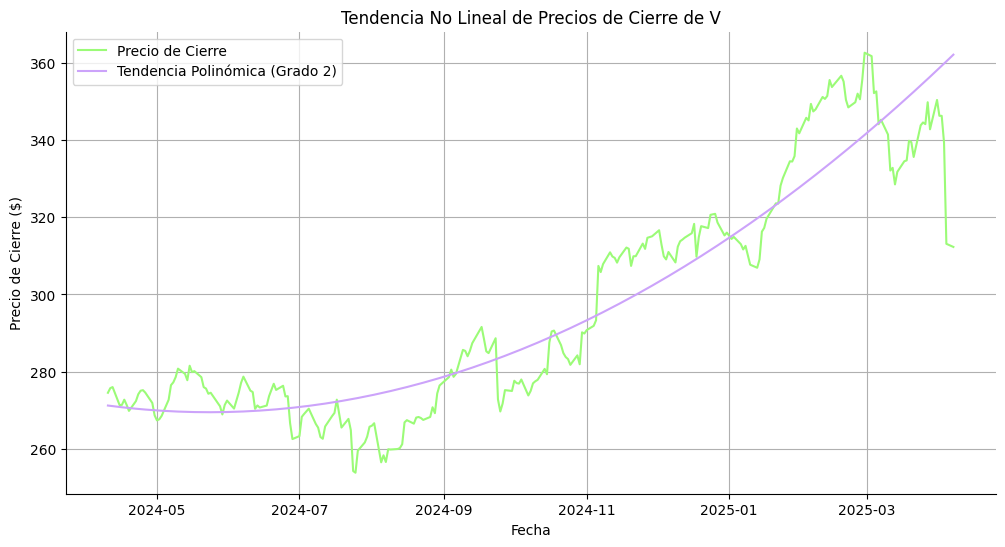

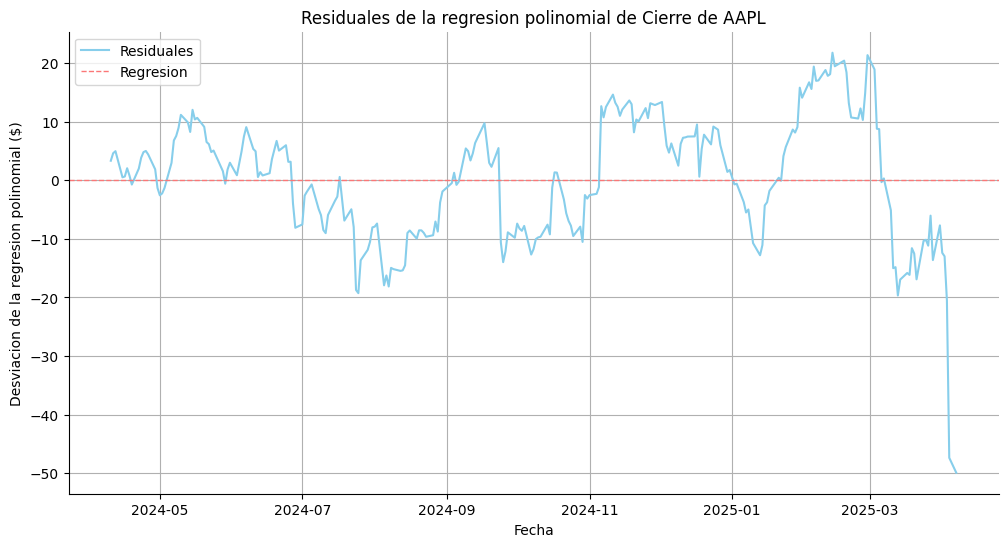

In [5]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['V_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='#9BFB77'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='#CCA3FA')
plt.title('Tendencia No Lineal de Precios de Cierre de V') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='skyblue')
plt.axhline(0, color='#FB7777', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#Representar la curva de forma más suave

La gráfica "Tendencia No Lineal de Precios de Cierre de V" muestra la evolución del precio de cierre de las acciones de la empresa V (Visa) a lo largo del tiempo, representado por la línea verde claro, junto con una línea morada que ilustra una tendencia polinómica de grado 2 ajustada a estos precios. La curva de tendencia polinómica busca capturar el movimiento general del precio a largo plazo, suavizando las fluctuaciones diarias. En este caso, se observa que la tendencia general del precio de cierre de Visa durante el periodo mostrado (aproximadamente desde abril de 2024 hasta marzo de 2025) presenta una trayectoria no lineal, con una fase inicial de relativa estabilidad seguida de un crecimiento acelerado a partir de mediados de 2024 y continuando hasta el final del periodo, aunque con cierta divergencia del precio real hacia el final. La gráfica permite visualizar cómo una tendencia cuadrática intenta modelar la dirección subyacente del precio, más allá de la volatilidad diaria.


---

La gráfica muestra los residuales de la regresión polinomial aplicada al precio de cierre de AAPL. La línea azul claro representa la diferencia entre el precio de cierre real y el valor predicho por la regresión polinomial en cada punto temporal, mientras que la línea roja punteada en cero indica la línea de la regresión. Los residuales fluctúan alrededor de cero, indicando la magnitud y dirección de los errores del modelo. Se observa que durante ciertos periodos, los residuales son consistentemente positivos o negativos, sugiriendo que la regresión polinomial no captura completamente la dinámica del precio en esos momentos. Hacia el final del periodo, se aprecia un aumento significativo en la magnitud de los residuales, lo que indica una mayor discrepancia entre el precio real y el valor predicho por el modelo polinómico. En general, la gráfica de residuales ayuda a evaluar la calidad del ajuste del modelo de regresión, donde fluctuaciones amplias sugieren que el modelo podría no ser una representación perfecta de la tendencia subyacente.

## Para Pros: Series de Fourier

Las series de Fourier descomponen cualquier cosa como una suma de senos y cosenos. Por esta razón, son una herramienta útil para extraer patrones oscilantes. Este es un tema muy complicado y alejado a todo lo que han manejado, por esta razón no les voy a pedir que lo usen. Aquí lo he simplificado tanto como he podido por si se animan.

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='#779BFB')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

  #Descompone los residuales, y la segunda tabla las suma y las acomoda a su favor

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.016064  815.529522             62.25
1    0.020080  806.507667             49.80
2    0.004016  660.651408            249.00
3    0.012048  559.613011             83.00
4    0.008032  554.387697            124.50


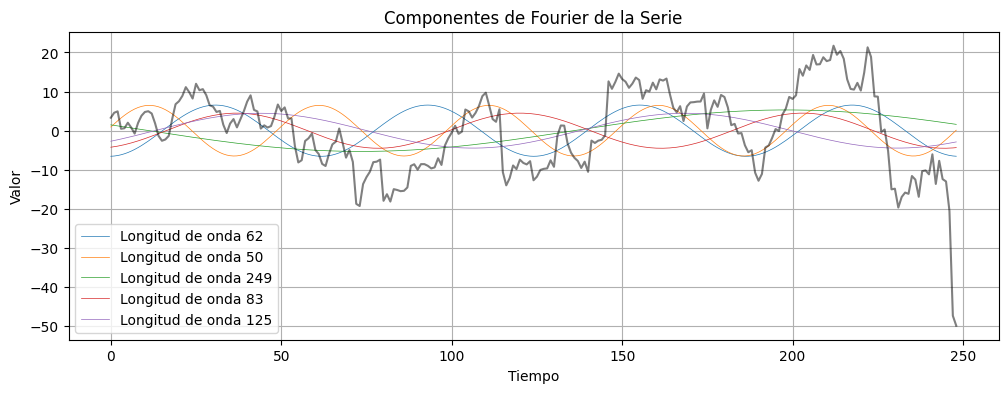

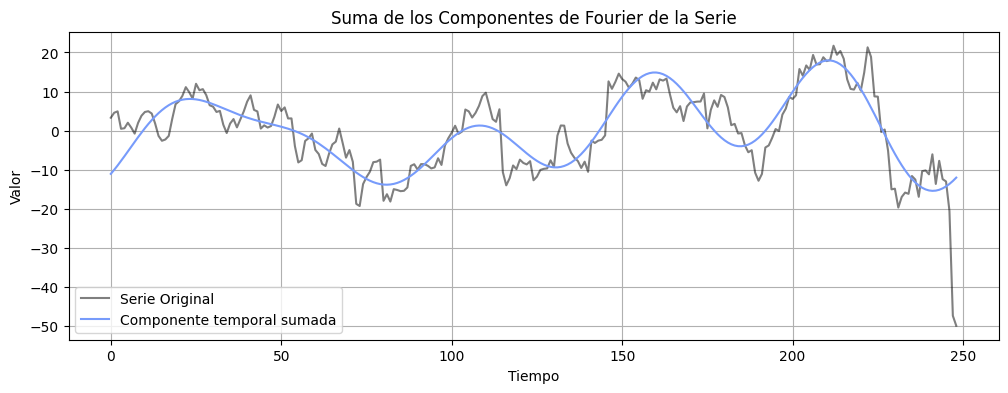

In [ ]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


En estos gráficos, la longitud de onda equivale a la unidad de tiempo (en este caso, días) que tarda la onda en volver al mismo sitio. Algo que en nuestro contexto podríamos interpretar como estasionalidad. Vemos que la oscilación más grande se presenta cada 378 días. Dado que esto es más de un año, esto sería más bien un ciclo. Sin embargo, se puede apreciar algo muy interesante, la longitud de onda siguiente es de 126 en unidades de tiempo (días) que es justo la mitad de la cantidad de días de negociación en un año!!! 😯

`sm.tsa.seasonal_descompose` descompone la serie de tiempo en los componentes Trend, Seasonal y Resid, que son Tendencia, Estacionalidad y Residuos, respectivamente. De tal manera que la serie de tiempo es igual la suma de estos tres elementos.

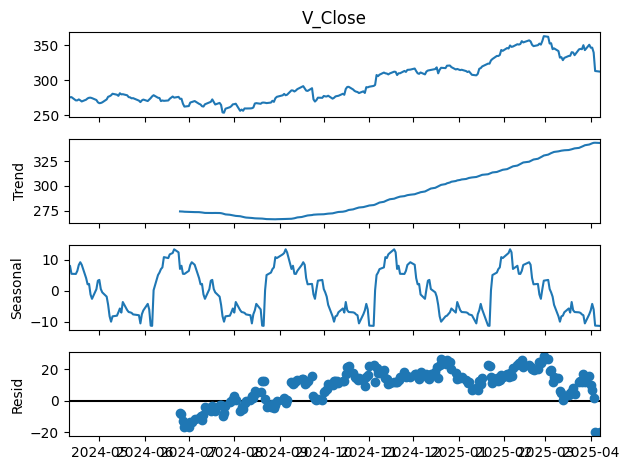

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['V_Close'],
    model='additive',
    period=52,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

el ruido siempre se va a llevar un poco de estacionalidad
el ruido no debe tener tendencia, debe ser estacionario\

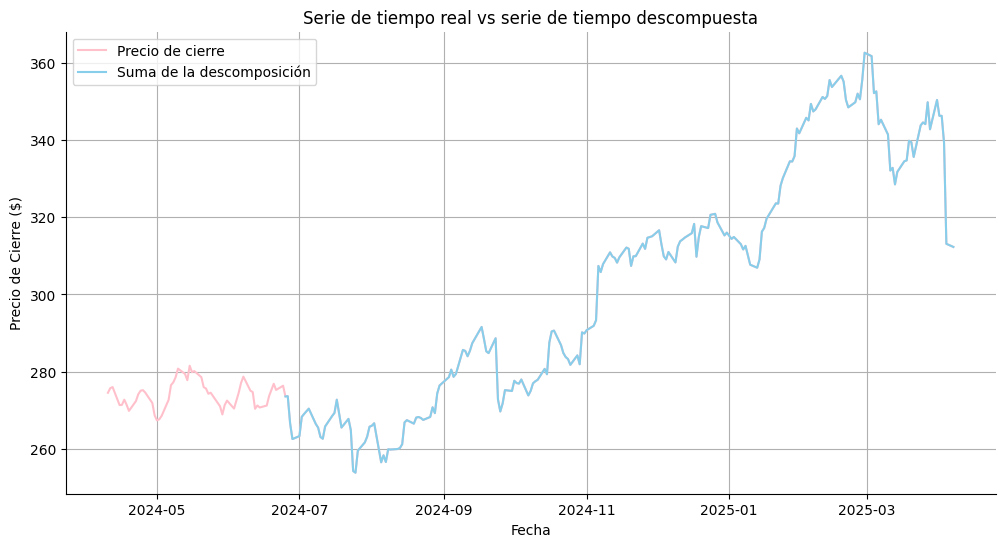

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['V_Close'], label='Precio de cierre', color='pink')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='skyblue')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

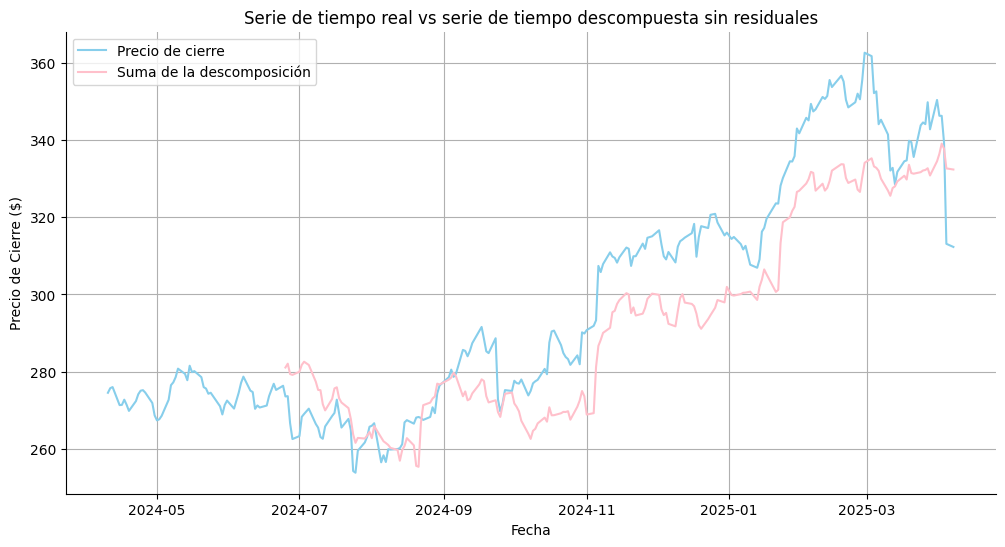

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['V_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

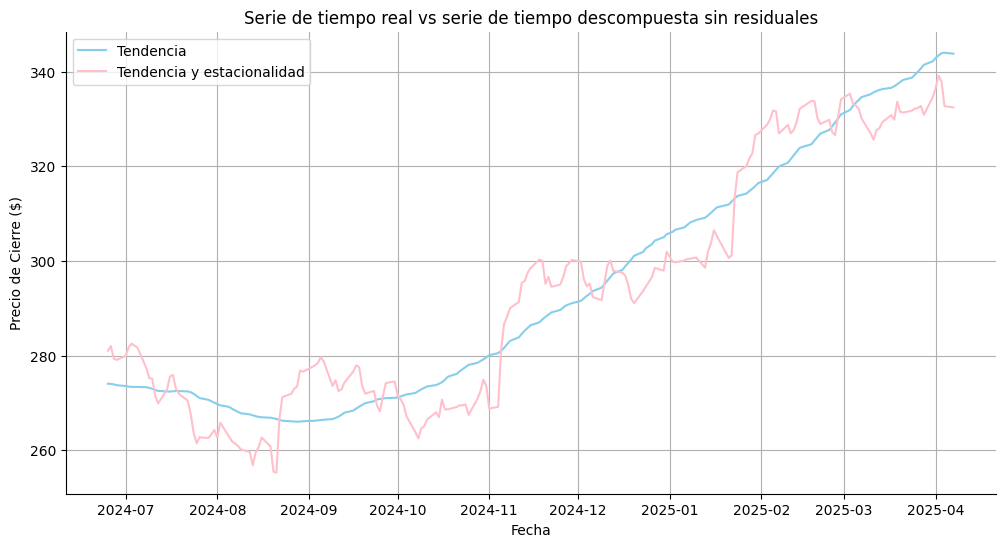

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Importante**: Es posible que hayan campturado bien la estacionalidad y que la prueba ADF de los residuales les indique que hay estacionariedad. Sin embargo, en el gráfico anterior vemos que no hay mucha diferencia entre la tendencia y la tendencia con estacionalidad. Por lo tanto, la estacionalidad, aunque existe, no es significativa. Esto se ilustra en el siguiente gráfico.

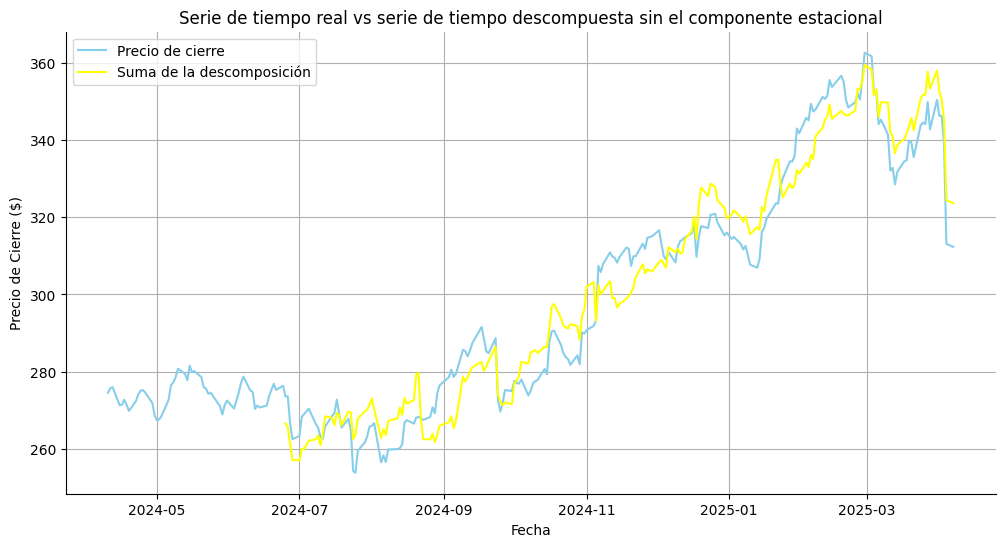

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['V_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='yellow')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Prueba t pareada para verificar si la estacionalidad tiene un efecto significativo

In [13]:
import pandas as pd
from scipy import stats

def realizar_prueba_t_pareada_estacionalidad(df, columna_precio, periodo_estacional):
    """
    Realiza una prueba t pareada para verificar si hay una diferencia significativa
    en el precio promedio entre dos puntos correspondientes en un periodo estacional.

    Args:
        df (pd.DataFrame): DataFrame con la columna de precio y una columna de fecha/índice.
        columna_precio (str): Nombre de la columna que contiene los precios.
        periodo_estacional (str): Frecuencia del periodo estacional ('M' para mensual, 'W' para semanal, etc.).
                                   Debe ser una frecuencia que pandas pueda entender.

    Returns:
        tuple: (estadistico_t, p_valor) de la prueba t pareada.
               Devuelve (None, None) si no hay suficientes datos para comparar.
    """
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        try:
            df.index = pd.to_datetime(df.index)
        except Exception as e:
            print(f"Error al convertir el índice a datetime: {e}")
            return None, None

    df_agregado = df.groupby(pd.Grouper(freq=periodo_estacional))[columna_precio].mean()

    if len(df_agregado) < 2:
        print("No hay suficientes periodos estacionales para realizar la prueba t pareada.")
        return None, None

    # Creamos pares de periodos consecutivos para la prueba t pareada
    muestra1 = df_agregado[:-1].values
    muestra2 = df_agregado[1:].values

    if len(muestra1) != len(muestra2) or len(muestra1) < 1:
        print("No se pudieron crear pares válidos para la prueba t pareada.")
        return None, None

    # Realizamos la prueba t pareada
    estadistico_t, p_valor = stats.ttest_rel(muestra1, muestra2)

    return estadistico_t, p_valor

# Ejemplo de uso (asumiendo que tienes un DataFrame llamado 'df_precios' con una columna 'Close' y un índice de fecha)
# y quieres verificar un efecto estacional mensual ('M'):

# Supongamos que 'df_precios' tiene esta estructura:
#             Close
# 2024-01-01  ...
# 2024-01-08  ...
# ...
# 2025-04-30  ...

# Generar datos de ejemplo (reemplazar con tus datos reales)
fechas = pd.to_datetime(pd.date_range(start='2024-01-01', end='2025-04-30', freq='D'))
precios = 200 + 5 * (fechas - fechas.min()).days / 30 + 10 * np.sin(2 * np.pi * (fechas - fechas.min()).days / 30) + np.random.normal(0, 5, len(fechas))
df_precios = pd.DataFrame({'Close': precios}, index=fechas)

periodo = 'M'  # Prueba para efecto estacional mensual
estadistico, p_valor = realizar_prueba_t_pareada_estacionalidad(df_precios.copy(), 'Close', periodo)

if estadistico is not None:
    print(f"Estadístico t: {estadistico:.4f}")
    print(f"P-valor: {p_valor:.4f}")
    alpha = 0.05
    if p_valor < alpha:
        print(f"El p-valor es menor que el nivel de significancia ({alpha}).")
        print("Hay evidencia estadísticamente significativa para sugerir un efecto estacional en el precio promedio mensual.")
    else:
        print(f"El p-valor es mayor o igual que el nivel de significancia ({alpha}).")
        print("No hay evidencia estadísticamente significativa para sugerir un efecto estacional en el precio promedio mensual.")

Estadístico t: -14.5078
P-valor: 0.0000
El p-valor es menor que el nivel de significancia (0.05).
Hay evidencia estadísticamente significativa para sugerir un efecto estacional en el precio promedio mensual.


# Prophet

In [ ]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='V',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2020-01-01',        # Fecha de inicio
    end='2020-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume
Date,,,,,,
2020-01-02,189.000000,191.139999,188.720001,191.119995,184.177414,8733000
2020-01-03,188.410004,190.960007,187.919998,189.600006,182.712646,4899700
2020-01-06,188.000000,189.210007,187.160004,189.190002,182.317520,10109500
2020-01-07,189.589996,190.100006,188.600006,188.690002,181.835678,4392300
2020-01-08,189.490005,192.500000,188.800003,191.919998,184.948380,5712000
...,...,...,...,...,...,...
2020-12-22,208.389999,208.399994,205.600006,205.839996,199.583710,7396200
2020-12-23,207.330002,207.330002,205.110001,205.300003,199.060104,6523100
2020-12-24,206.639999,208.820007,206.600006,208.699997,202.356796,3367900


In [ ]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgt4386ju/cd1v45ln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgt4386ju/em12tfzk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33724', 'data', 'file=/tmp/tmpgt4386ju/cd1v45ln.json', 'init=/tmp/tmpgt4386ju/em12tfzk.json', 'output', 'file=/tmp/tmpgt4386ju/prophet_modelml249jxb/prophet_model-20250506034556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:45:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:45:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


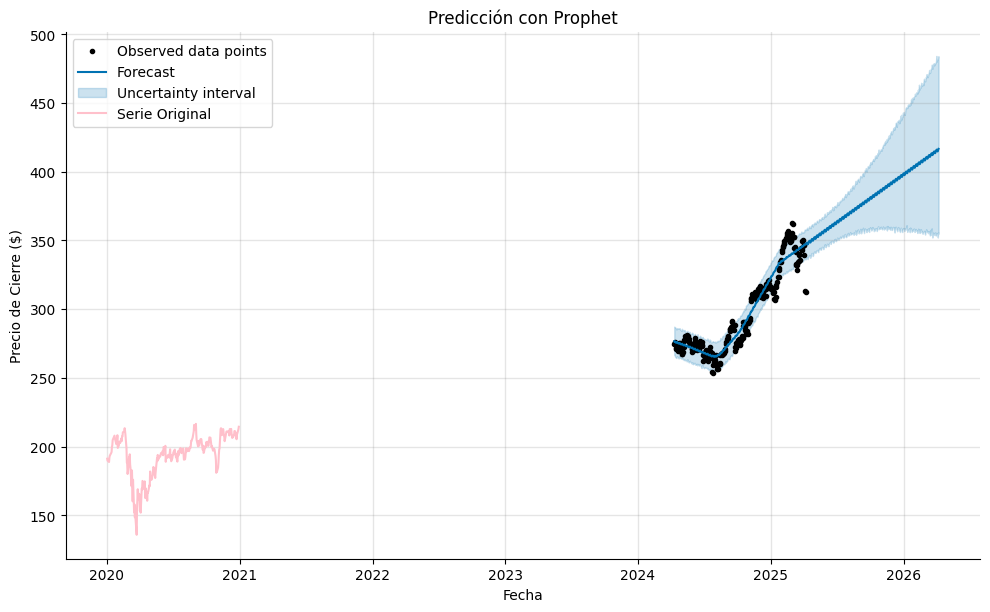

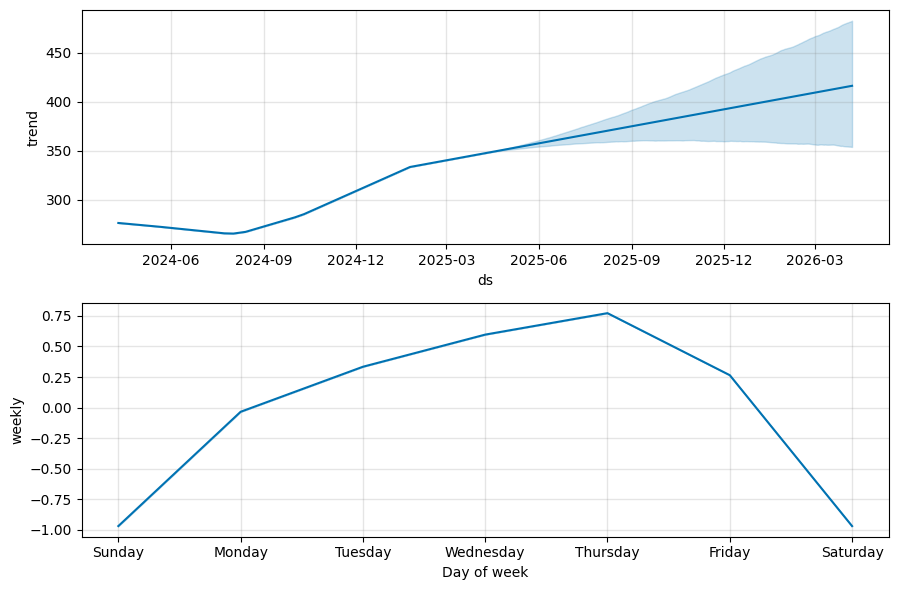

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['V_Close'].reset_index().rename(columns={'Date': 'ds', 'V_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['V_Close'], label='Serie Original', color='pink')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)



El modelo Prophet ha tomado los datos históricos (mostrados en rosa y luego en negro) y ha generado una predicción para el futuro (línea azul) con un intervalo de incertidumbre (área azul claro).

La tendencia observada hasta mediados de 2025 muestra fluctuaciones, pero con una clara tendencia alcista en la parte más reciente de los datos de entrenamiento.
El pronóstico sugiere que esta tendencia alcista continuará hasta finales de 2026, aunque con un intervalo de incertidumbre que se amplía a medida que la predicción se extiende más en el futuro, lo cual es típico en los pronósticos de series de tiempo.
La serie original revela un comportamiento pasado diferente, con fluctuaciones significativas y sin una tendencia alcista tan marcada en el periodo 2020-2024 como la que se observa justo antes del periodo de predicción. Esto sugiere que el modelo está principalmente influenciado por el comportamiento más reciente de la serie.


---
Línea azul oscuro: Representa la tendencia a largo plazo que el modelo Prophet ha identificado en los datos históricos y proyecta hacia el futuro. Se observa una tendencia alcista general que comienza a moderarse hacia finales del periodo de predicción.
Área sombreada azul claro: Muestra el intervalo de incertidumbre de la tendencia. Al igual que en la predicción general, este intervalo se amplía a medida que se proyecta más hacia el futuro, reflejando una mayor incertidumbre sobre la tendencia a largo plazo.

---

Línea azul: Ilustra el patrón estacional semanal que el modelo Prophet ha detectado en los datos. El eje horizontal representa los días de la semana (Sunday a Saturday), y el eje vertical muestra la magnitud del ajuste de la predicción debido al día de la semana.
Se observa un patrón claro:
Los precios tienden a ser más bajos los domingos y sábados (valores negativos).
Los precios tienden a aumentar a lo largo de la semana, alcanzando su punto máximo los jueves.
Hay una ligera disminución los viernes.


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgt4386ju/y17u2tt5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgt4386ju/mfgjucxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17514', 'data', 'file=/tmp/tmpgt4386ju/y17u2tt5.json', 'init=/tmp/tmpgt4386ju/mfgjucxa.json', 'output', 'file=/tmp/tmpgt4386ju/prophet_modelnfr8t1vm/prophet_model-20250506034627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


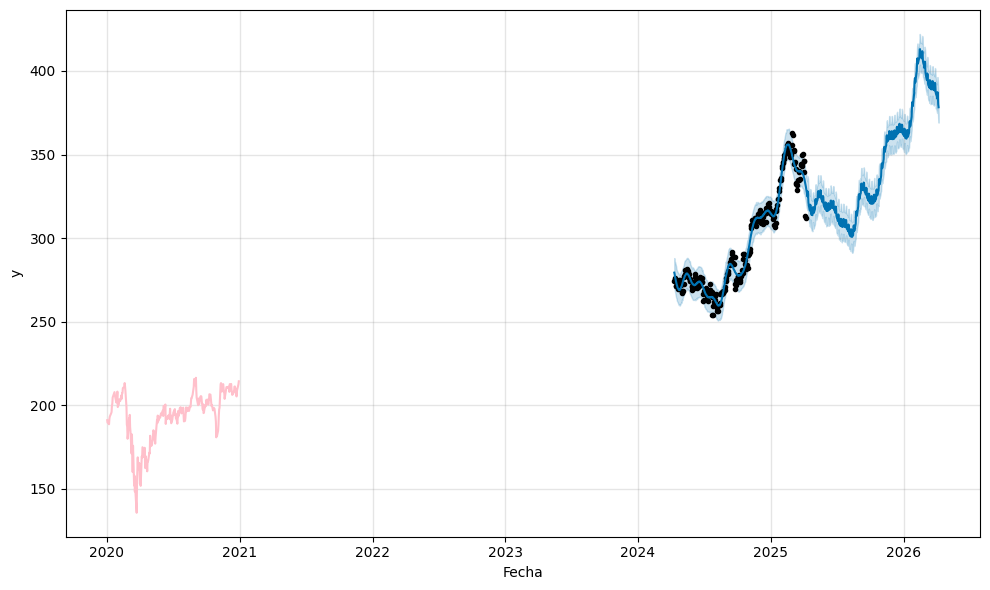

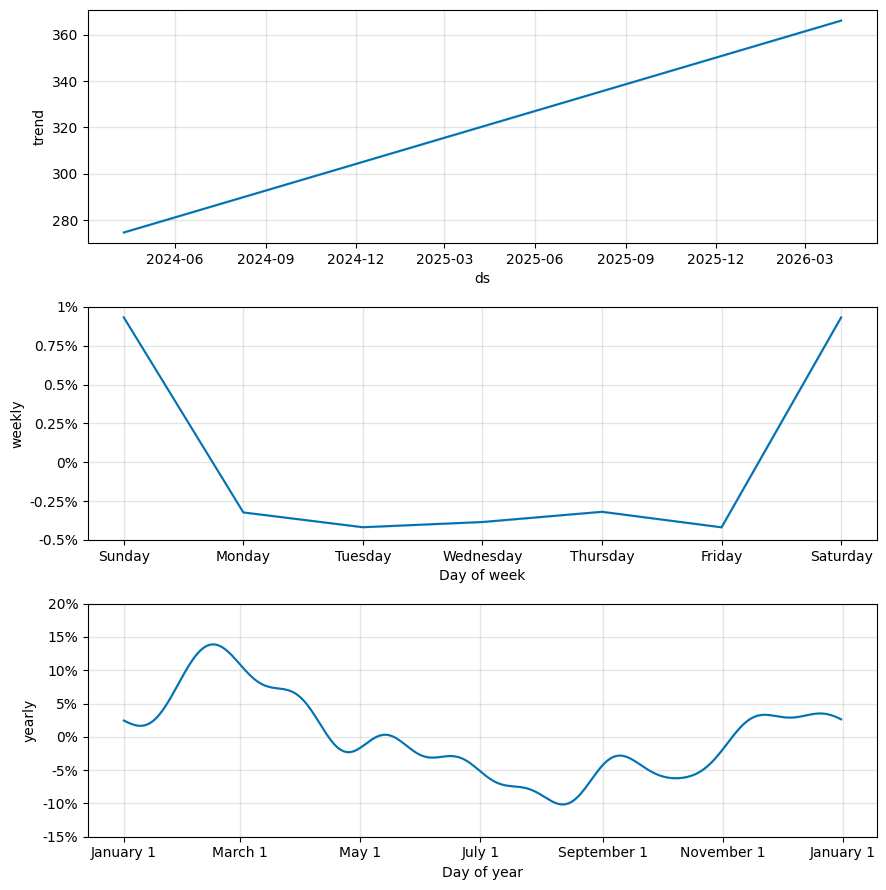

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['V_Close'].reset_index().rename(columns={'Date': 'ds', 'V_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['V_Close'], label='Serie Original', color='pink')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)



# Más de una serie temporal a la vez

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['V', 'NVDA'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-04-10',        # Fecha de inicio
    end='2025-04-08',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume,NVDA_Open,NVDA_High,NVDA_Low,NVDA_Close,NVDA_Adj Close,NVDA_Volume
Date,,,,,,,,,,,,
2024-04-10,275.420013,276.820007,274.119995,274.480011,272.447418,5276000,83.926003,87.400002,83.709000,87.039001,87.010406,431929000
2024-04-11,274.000000,276.480011,272.179993,275.679993,273.638458,8102300,87.419998,90.738998,86.926003,90.615997,90.586235,431637000
2024-04-12,275.549988,277.000000,274.059998,275.959991,273.916412,9037900,89.698997,90.175003,87.529999,88.185997,88.157036,426805000
2024-04-15,277.890015,277.910004,270.339996,271.279999,269.271057,10267500,89.098000,90.612999,85.929001,86.000999,85.972740,443077000
2024-04-16,270.540009,274.130005,270.170013,271.350006,269.340576,8237100,86.432999,88.117996,86.064003,87.415001,87.386284,370453000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,350.440002,350.450012,342.570007,346.350006,346.350006,7473300,108.519997,110.199997,106.470001,110.150002,110.150002,222614000
2025-04-02,343.440002,348.200012,343.049988,346.329987,346.329987,5682500,107.290001,111.980003,106.790001,110.419998,110.419998,220601200
2025-04-03,333.899994,344.739990,331.000000,339.390015,339.390015,8792900,103.510002,105.629997,101.599998,101.800003,101.800003,338769400


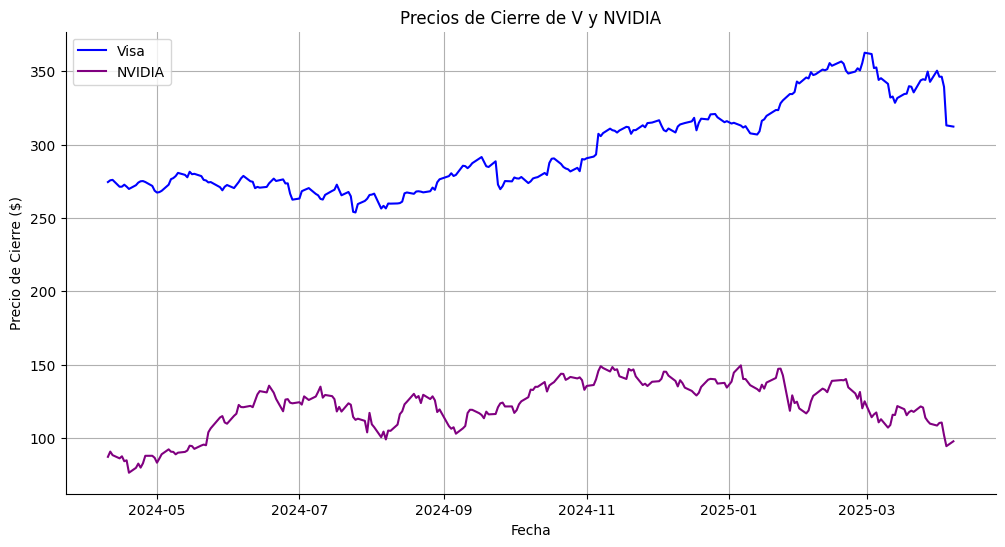

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['V_Close'], label='Visa', color='blue')
plt.plot(df['NVDA_Close'], label='NVIDIA', color='purple')
plt.title('Precios de Cierre de V y NVIDIA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Análisis Individual de las Acciones:

Visa (V) - Línea Azul:

Al inicio del periodo, el precio de cierre de Visa se encuentra alrededor de los 275-280 dólares.
Muestra una tendencia generalmente alcista a lo largo del periodo, aunque con algunas fluctuaciones y periodos de lateralización.
Se observa un crecimiento notable a partir de finales de 2024, alcanzando máximos alrededor de los 350-360 dólares a principios de 2025.
Hacia el final del periodo, experimenta cierta volatilidad y un ligero descenso, aunque se mantiene en niveles superiores a los del inicio.

NVIDIA (NVDA) - Línea Morada:

Comienza el periodo con un precio de cierre inferior al de Visa, alrededor de los 80-90 dólares.
También exhibe una tendencia alcista general durante el periodo, aunque con una mayor volatilidad en comparación con Visa. Se observan picos y caídas más pronunciados.
Muestra un crecimiento significativo a lo largo del tiempo, superando los 140-150 dólares hacia finales de 2024 y principios de 2025.
Al igual que Visa, experimenta cierta volatilidad hacia el final del periodo, con un descenso notable en el precio.

Comparación entre Visa y NVIDIA:

Nivel de Precio: Visa cotiza a un precio significativamente mayor que NVIDIA durante todo el periodo mostrado.
Tendencia General: Ambas acciones muestran una tendencia alcista general durante la mayor parte del periodo.
Volatilidad: El precio de las acciones de NVIDIA parece ser más volátil que el de Visa, con mayores oscilaciones en el corto plazo.
Rendimiento Relativo: Aunque ambas crecieron, la variación porcentual del precio de NVIDIA parece ser mayor que la de Visa durante este periodo, partiendo de un precio base mucho más bajo.


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['V_Close', 'NVDA_Close']], max_lags, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6431  , p=0.0322  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=4.6999  , p=0.0302  , df=1
likelihood ratio test: chi2=4.6560  , p=0.0309  , df=1
parameter F test:         F=4.6431  , p=0.0322  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2646  , p=0.1061  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=4.6228  , p=0.0991  , df=2
likelihood ratio test: chi2=4.5801  , p=0.1013  , df=2
parameter F test:         F=2.2646  , p=0.1061  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4726  , p=0.2226  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=4.5471  , p=0.2081  , df=3
likelihood ratio test: chi2=4.5056  , p=0.2118  , df=3
parameter F test:         F=1.4726  , p=0.2226  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0653  , p=0.3743  

La hipótesis nula (H₀) de la prueba de causalidad de Granger es que la serie X no causa en el sentido de Granger a la serie Y. Rechazamos la hipótesis nula si el p-valor asociado con la prueba es menor que un nivel de significancia predefinido (comúnmente 0.05). Si rechazamos la hipótesis nula, concluimos que los valores pasados de X sí contienen información estadísticamente significativa para predecir los valores futuros de Y.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['NVDA_Close', 'V_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7736  , p=0.3800  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.7831  , p=0.3762  , df=1
likelihood ratio test: chi2=0.7819  , p=0.3766  , df=1
parameter F test:         F=0.7736  , p=0.3800  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6200  , p=0.5388  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=1.2657  , p=0.5311  , df=2
likelihood ratio test: chi2=1.2625  , p=0.5319  , df=2
parameter F test:         F=0.6200  , p=0.5388  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4475  , p=0.7193  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.3817  , p=0.7098  , df=3
likelihood ratio test: chi2=1.3778  , p=0.7107  , df=3
parameter F test:         F=0.4475  , p=0.7193  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7369  , p=0.5676  

Número de rezagos (no zero) 1:

El p-valor para todas las pruebas (ssr based F, ssr based chi2, likelihood ratio, parameter F) es alrededor de 0.37-0.38 (0.3800, 0.3762, 0.3766), que es mayor que 0.05.
Conclusión para 1 rezago: No rechazamos la hipótesis nula. No hay evidencia estadísticamente significativa para decir que la primera serie causa en el sentido de Granger a la segunda serie cuando se considera un solo rezago.

Número de rezagos (no zero) 2:

El p-valor para todas las pruebas (ssr based F, ssr based chi2, likelihood ratio, parameter F) es alrededor de 0.53 (0.5388, 0.5311, 0.5319), que es mayor que 0.05.
Conclusión para 2 rezagos: No rechazamos la hipótesis nula. No hay evidencia estadísticamente significativa de causalidad de Granger con dos rezagos.

Número de rezagos (no zero) 3:

El p-valor para todas las pruebas (ssr based F, ssr based chi2, likelihood ratio, parameter F) es alrededor de 0.70-0.71 (0.7193, 0.7098, 0.7107), que es mayor que 0.05.
Conclusión para 3 rezagos: No rechazamos la hipótesis nula. No hay evidencia estadísticamente significativa de causalidad de Granger con tres rezagos.

Número de rezagos (no zero) 4:

El p-valor para todas las pruebas (ssr based F, ssr based chi2, likelihood ratio, parameter F) es alrededor de 0.55-0.57 (0.5676, 0.5478, 0.5510), que es mayor que 0.05.
Conclusión para 4 rezagos: No rechazamos la hipótesis nula. No hay evidencia estadísticamente significativa de causalidad de Granger con cuatro rezagos.

Número de rezagos (no zero) 5:

El p-valor para todas las pruebas (ssr based F, ssr based chi2, likelihood ratio, parameter F) es alrededor de 0.66-0.68 (0.6861, 0.6635, 0.6668), que es mayor que 0.05.
Conclusión para 5 rezagos: No rechazamos la hipótesis nula. No hay evidencia estadísticamente significativa de causalidad de Granger con cinco rezagos.



---

Basándonos en estos resultados, no hay evidencia estadísticamente significativa para rechazar la hipótesis nula en ninguno de los casos (para 1, 2, 3, 4 o 5 rezagos). Esto significa que, según la prueba de causalidad de Granger, no podemos concluir que la primera serie temporal cause en el sentido de Granger a la segunda serie temporal para los números de rezagos examinados. Los valores pasados de la primera serie no parecen proporcionar información estadísticamente útil para predecir los valores futuros de la segunda serie dentro del marco de esta prueba y con los rezagos considerados.